1. Import the dataset using Pandas from above mentioned url.
2. High Level Data Understanding:
    a. Find no. of rows & columns in the dataset
    b. Data types of columns.
    c. Info & describe of data in dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url= "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
covid_data = pd.read_csv(url)

# 2. High Level Data Understanding:

# a. Find no. of rows & columns in the dataset
num_rows, num_columns = covid_data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")




Number of rows: 57394
Number of columns: 49


In [2]:
# b. Data types of columns
data_types = covid_data.dtypes

print(data_types)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [3]:
# c. Info & describe of data in dataframe''
print("\nInfo of the dataframe:")
print(covid_data.info())


print(covid_data.describe())


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_mil

3. Low Level Data Understanding :
    a. Find count of unique values in location column.
    b. Find which continent has maximum frequency using values 
        counts.
    c. Find maximum & mean value in 'total_cases'.
    d. Find 25%,50% & 75% quartile value in 'total_deaths'.
    e. Find which continent has maximum 
        'human_development_index'.
    f. Find which continent has minimum 'gdp_per_capita'.

In [4]:


# a. Find count of unique values in the 'location' column.
unique_loc = covid_data['location'].nunique()
print(f"\nlocation column: {unique_loc}")

# b. Find which continent has the maximum frequency using value counts.
max_fre = covid_data['continent'].value_counts().idxmax()
print(f"\nmaximum frequency: {max_fre}")

# c. Find the maximum and mean value in 'total_cases'.
max_total = covid_data['total_cases'].max()
mean_total = covid_data['total_cases'].mean()
print(f"\nMaximum value : {max_total}")
print(f"Mean value : {mean_total}")

# d. Find 25%, 50%, and 75% quartile values in 'total_deaths'.
quartiles = covid_data['total_deaths'].quantile([0.25, 0.5, 0.75])
print("\nQuartile values in total deaths:")
print(quartiles)

# e. Find which continent has the maximum total_cases.
max_total = covid_data.groupby('continent')['total_cases'].sum().idxmax()
print(f"\nmaximum total cases: {max_total}")



location column: 216

maximum frequency: Europe

Maximum value : 55154651.0
Mean value : 167797.3688753302

Quartile values in total deaths:
0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

maximum total cases: Asia


4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_ca
pita','
human_development_index'] and update the data frame.

In [5]:
# 4. Filter the dataframe with only specified columns
columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
filter = covid_data[columns]

print("\nUpdated DataFrame with selected columns:")
print(filter.head())



Updated DataFrame with selected columns:
  continent     location      date  total_cases  total_deaths  gdp_per_capita  \
0      Asia  Afghanistan  31/12/19          NaN           NaN        1803.987   
1      Asia  Afghanistan  01/01/20          NaN           NaN        1803.987   
2      Asia  Afghanistan  02/01/20          NaN           NaN        1803.987   
3      Asia  Afghanistan  03/01/20          NaN           NaN        1803.987   
4      Asia  Afghanistan  04/01/20          NaN           NaN        1803.987   

   human_development_index  
0                    0.498  
1                    0.498  
2                    0.498  
3                    0.498  
4                    0.498  


5. Data Cleaning
 a. Remove all duplicates observations
 b. Find missing values in all columns
 c. Remove all observations where continent column value is 
missing
 Tip : using subset parameter in dropna
 d. Fill all missing values with 0

In [6]:

# a. Remove all duplicate observations
data = covid_data.drop_duplicates()



In [7]:
# b. Find missing values in all columns
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037


In [8]:
# c. Remove all observations where the 'continent' column value is missing
data = data.dropna(subset=['continent'])


In [9]:
# d. Fill all missing values with 0
data = data.fillna(0)

print("\nCleaned DataFrame:")
print(data.head())


Cleaned DataFrame:
  iso_code continent     location      date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  31/12/19          0.0        0.0   
1      AFG      Asia  Afghanistan  01/01/20          0.0        0.0   
2      AFG      Asia  Afghanistan  02/01/20          0.0        0.0   
3      AFG      Asia  Afghanistan  03/01/20          0.0        0.0   
4      AFG      Asia  Afghanistan  04/01/20          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 0.0           0.0         0.0                  0.0  ...   
1                 0.0           0.0         0.0                  0.0  ...   
2                 0.0           0.0         0.0                  0.0  ...   
3                 0.0           0.0         0.0                  0.0  ...   
4                 0.0           0.0         0.0                  0.0  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987            

6. Date time format :
 a. Convert date column in datetime format using 
pandas.to_datetime
 b. Create new column month after extracting month data from 
date column.

In [23]:

# a. Convert the 'date' column to datetime format using pandas.to_datetime
data['date'] = pd.to_datetime(data['date'])



In [11]:
# b. Create a new column 'month' after extracting month data from the 'date' column
data['month'] = data['date'].dt.month

print("\nDataFrame with updated date column and new month column:")
print(data.head())


DataFrame with updated date column and new month column:
  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan 2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-01          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-03-01          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-04-01          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 0.0           0.0         0.0                  0.0  ...   
1                 0.0           0.0         0.0                  0.0  ...   
2                 0.0           0.0         0.0                  0.0  ...   
3                 0.0           0.0         0.0                  0.0  ...   
4                 0.0           0.0         0.0                  0.0  ...   

   extreme_poverty  cardiovasc_death_rate  dia

7. Data Aggregation:
 a. Find max value in all columns using groupby function on 
'continent'
 column
 Tip: use reset_index() after applying groupby
 b. Store the result in a new dataframe named 'df_groupby'.
 (Use df_groupby dataframe for all further analysis)

In [12]:
# a. Find max value in all columns using groupby function on 'continent' column
df_groupby = data.groupby('continent').max().reset_index()

print(df_groupby.head())


       continent iso_code                      location       date  \
0         Africa      ZWE                      Zimbabwe 2020-12-11   
1           Asia      YEM                         Yemen 2020-12-11   
2         Europe      VAT                       Vatican 2020-12-11   
3  North America      VIR  United States Virgin Islands 2020-12-11   
4        Oceania      WLF             Wallis and Futuna 2020-12-11   

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0     752269.0    13944.0           12583.714       20314.0       572.0   
1    8874290.0    97894.0           93198.571      130519.0      2003.0   
2    1991233.0    86852.0           54868.571       52147.0      2004.0   
3   11205486.0   184813.0          156419.143      247220.0      4928.0   
4      27750.0     1384.0             551.714         907.0        59.0   

   new_deaths_smoothed  ...  extreme_poverty  cardiovasc_death_rate  \
0              297.429  ...             77.6             

In [13]:
# b. Store the result in a new dataframe named 'df_groupby'
df_groupby.to_csv("df_groupby.csv", index=False)

print(df_groupby)

       continent iso_code                      location       date  \
0         Africa      ZWE                      Zimbabwe 2020-12-11   
1           Asia      YEM                         Yemen 2020-12-11   
2         Europe      VAT                       Vatican 2020-12-11   
3  North America      VIR  United States Virgin Islands 2020-12-11   
4        Oceania      WLF             Wallis and Futuna 2020-12-11   
5  South America      VEN                     Venezuela 2020-12-11   

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0     752269.0    13944.0           12583.714       20314.0       572.0   
1    8874290.0    97894.0           93198.571      130519.0      2003.0   
2    1991233.0    86852.0           54868.571       52147.0      2004.0   
3   11205486.0   184813.0          156419.143      247220.0      4928.0   
4      27750.0     1384.0             551.714         907.0        59.0   
5    5876464.0    69074.0           46393.000      166014.0

8. Feature Engineering :
 a. Create a new feature 'total_deaths_to_total_cases' by ratio of
 'total_deaths' column to 'total_cases'

In [14]:

# a. Create a new feature 'total_deaths_to_total_cases' by the ratio of 'total_deaths' to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

print(df_groupby.head())


       continent iso_code                      location       date  \
0         Africa      ZWE                      Zimbabwe 2020-12-11   
1           Asia      YEM                         Yemen 2020-12-11   
2         Europe      VAT                       Vatican 2020-12-11   
3  North America      VIR  United States Virgin Islands 2020-12-11   
4        Oceania      WLF             Wallis and Futuna 2020-12-11   

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0     752269.0    13944.0           12583.714       20314.0       572.0   
1    8874290.0    97894.0           93198.571      130519.0      2003.0   
2    1991233.0    86852.0           54868.571       52147.0      2004.0   
3   11205486.0   184813.0          156419.143      247220.0      4928.0   
4      27750.0     1384.0             551.714         907.0        59.0   

   new_deaths_smoothed  ...  cardiovasc_death_rate  diabetes_prevalence  \
0              297.429  ...                525.432   

9. Data Visualization :
 a. Perform Univariate analysis on 'gdp_per_capita' column by 
plotting
 histogram using seaborn dist plot.
 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
 c. Plot a bar plot of 'continent' column with 'total_cases' .
 Tip : using kind='bar' in seaborn catplot

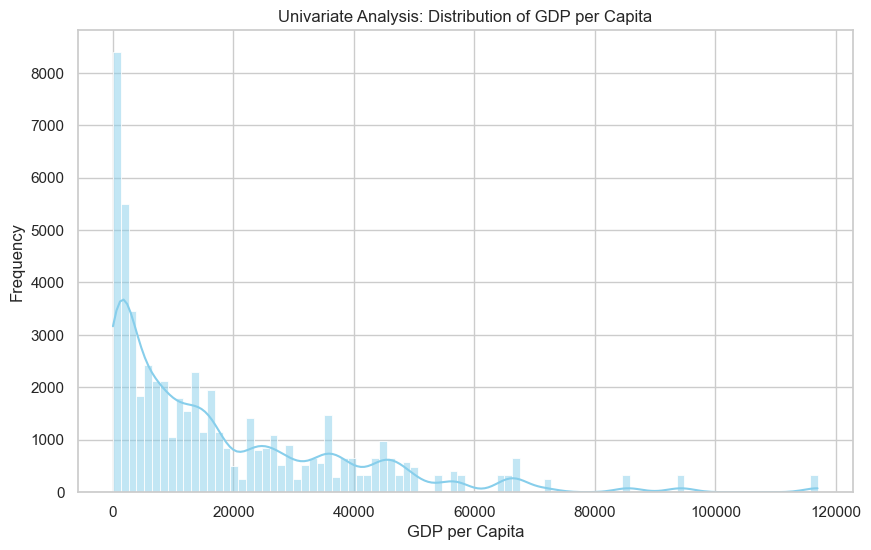

In [15]:

# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['gdp_per_capita'], kde=True, color='skyblue')
plt.title('Univariate Analysis: Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()




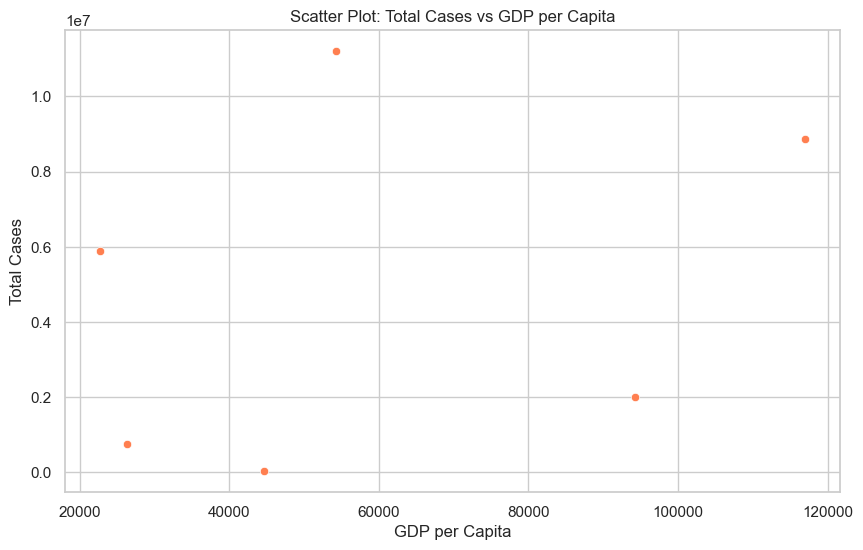

In [16]:
# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=df_groupby, color='coral')
plt.title('Scatter Plot: Total Cases vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.show()

c:\Users\deepu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

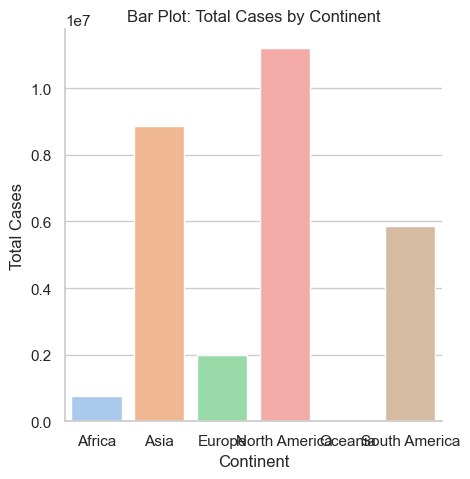

In [25]:
# c. Plot a bar plot of 'continent' column with 'total_cases'
plt.figure(figsize=(12, 6))
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar', palette='pastel')
plt.title('Bar Plot: Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

10. Save the df_groupby dataframe in your local drive using 
pandas.to_csv
 function .

In [19]:

df_groupby.to_csv('df_groupby.csv', index=False)
print("DataFrame df groupby has been saved to df_groupby.csv")


DataFrame df groupby has been saved to df groupby.csv
